In [1]:
import keras

Using TensorFlow backend.


# Dataset Preprocessing

In [2]:
import urllib.request, json 
with urllib.request.urlopen("http://statistik.easycredit-bbl.de/XML/exchange/540/Schedule.php?type=json&saison=2017&fixedGamesOnly=0") as url:
    games = json.loads(url.read().decode())
    print(json.dumps(games, indent=4, sort_keys=True))

{
    "competition": [
        {
            "@attributes": {
                "ID": "1",
                "title": "easyCredit BBL Hauptrunde"
            },
            "spiel": [
                {
                    "arenaLat": "49.77337",
                    "arenaLon": "9.93923",
                    "arenaName": "S.Oliver-Arena",
                    "bbl_spielID": "20826",
                    "datum": "2017-09-29",
                    "gast": "Brose Bamberg",
                    "gastCity": "Brose Bamberg",
                    "gast_id": "420",
                    "gast_result": "73",
                    "home": "s.Oliver W\u00fcrzburg",
                    "homeCity": "W\u00fcrzburg",
                    "home_id": "540",
                    "home_result": "76",
                    "init_url": "http://live.beko-bbl.de/data/bbl/540/20826.JSN",
                    "live_url": "http://live.beko-bbl.de/data/bbl/540/20826.JSN",
                    "spiel_nummer": "0",
                 

In [3]:
type(games)

dict

In [4]:
import urllib.request, json 
with urllib.request.urlopen("http://statistik.easycredit-bbl.de/XML/exchange/540/Standings.php?type=json") as url:
    team = json.loads(url.read().decode())

print(team['team'][0]['team'])
print(team['team'][0]['team_id'])

FC Bayern München
486


In [5]:
t = 0
team_ids = [] 
while t < 18:
    team_ids.append(team['team'][t]['team_id'])
    t=t+1
print(team_ids)

['486', '413', '433', '420', '415', '425', '430', '426', '540', '418', '421', '422', '483', '477', '428', '439', '517', '432']


In [6]:
j = 0
team_namen = [] 
while j < 18:
    team_namen.append(team['team'][j]['team_id'])
    team_namen.append(team['team'][j]['team'])
    j=j+1

print(team_namen)

['486', 'FC Bayern München', '413', 'ALBA BERLIN', '433', 'MHP RIESEN Ludwigsburg', '420', 'Brose Bamberg', '415', 'Telekom Baskets Bonn', '425', 'medi bayreuth', '430', 'EWE Baskets Oldenburg', '426', 'FRAPORT SKYLINERS', '540', 's.Oliver Würzburg', '418', 'ratiopharm ulm', '421', 'GIESSEN 46ers', '422', 'Basketball Löwen Braunschweig', '483', 'Science City Jena', '477', 'BG Göttingen', '428', 'Mitteldeutscher BC', '439', 'Eisbären Bremerhaven', '517', 'Rockets', '432', 'WALTER Tigers Tübingen']


In [7]:
 from sklearn.preprocessing import LabelBinarizer
 encoder = LabelBinarizer()
 transformed_label = encoder.fit_transform(team_ids)

 print(transformed_label)

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]]


In [8]:
home_id = "418"
index = team_ids.index(home_id)
print(index)
print(transformed_label[index])

9
[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [9]:
    def make_pair(home_id, gast_id, home_win):

        home_index = team_ids.index(home_id)
        home_encoded = transformed_label[home_index]

        gast_index = team_ids.index(gast_id)
        gast_encoded = transformed_label[gast_index]

        if home_win == True:
            win_encoded = 1.0
        else: 
            win_encoded = 0.0

        return (home_encoded, gast_encoded), win_encoded

    input, output = make_pair("418", "486", False)

    print(input)
    print(output)

(array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]))
0.0


In [10]:
print (games['competition'][0]['spiel'][0]['home_id'])

540


## Preprocessing dataset: 
    - hot encoded

In [11]:
#
import numpy as np

def make_pair(home_id, gast_id, home_win):
        
    home_index = team_ids.index(home_id)
    home_encoded = transformed_label[home_index]

    gast_index = team_ids.index(gast_id)
    gast_encoded = transformed_label[gast_index]

    if home_win == True:
        win_encoded = 1.0
    else: win_encoded = 0.0

    return (np.append(home_encoded, gast_encoded)), win_encoded
    
inputs = []
outputs = []

#amount_val = 30
inputs_val = []
outputs_val = []



for i in range(0,len(games['competition'][0]['spiel'])):
    
    home_win = False

    if games['competition'][0]['spiel'][i]['home_result'] > games['competition'][0]['spiel'][i]['gast_result']:
        home_win = True
    else: home_win = False
        
    input, output = make_pair(games['competition'][0]['spiel'][i]['home_id'], games['competition'][0]['spiel'][i]['gast_id'], home_win)
    
    # Validation Menge bestimmten
    if i > 276: 
        inputs.append(input)
        outputs.append(output)
    else: 
        inputs_val.append(input)
        outputs_val.append(output)
        
    
    
print(inputs)
print(outputs)



[array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]), array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]), array([

In [12]:
# Importing the Keras libraries and packages 
from keras.models import Sequential
from keras.layers import Dense


# Initialising the ANN
regressor = Sequential()

# Adding the input layer and the first hidden layer
regressor.add(Dense(units = 36, kernel_initializer = 'uniform', activation = 'relu', input_shape = (36,)))

# Adding the second hidden layer
regressor.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer
regressor.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

#Summary 
regressor.summary()

#Compiling the ANN - wie soll es lernen
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['accuracy'])

# Fitting the ANN to the Training set
history = regressor.fit(np.array(inputs), np.array(outputs), batch_size = 10, epochs = 100, validation_split = 0.1)



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 36)                1332      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                370       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 1,713
Trainable params: 1,713
Non-trainable params: 0
_________________________________________________________________
Train on 26 samples, validate on 3 samples
Epoch 1/100
26/26 [==============================] - 0s 7ms/step - loss: 0.2500 - acc: 0.5000 - val_loss: 0.2502 - val_acc: 0.3333
Epoch 2/100
26/26 [==============================] - 0s 238us/step - loss: 0.2499 - acc: 0.5385 - val_loss: 0.2503 - val_acc: 0.3333
Epoch 3/100
26/26 [==============================] - 0s 247us/step - loss: 0.2498 - acc: 0.5385 -

26/26 [==============================] - 0s 284us/step - loss: 0.0335 - acc: 1.0000 - val_loss: 0.3159 - val_acc: 0.3333
Epoch 57/100
26/26 [==============================] - 0s 258us/step - loss: 0.0310 - acc: 1.0000 - val_loss: 0.3170 - val_acc: 0.3333
Epoch 58/100
26/26 [==============================] - 0s 297us/step - loss: 0.0285 - acc: 1.0000 - val_loss: 0.3181 - val_acc: 0.3333
Epoch 59/100
26/26 [==============================] - 0s 262us/step - loss: 0.0262 - acc: 1.0000 - val_loss: 0.3191 - val_acc: 0.3333
Epoch 60/100
26/26 [==============================] - 0s 247us/step - loss: 0.0240 - acc: 1.0000 - val_loss: 0.3203 - val_acc: 0.3333
Epoch 61/100
26/26 [==============================] - 0s 260us/step - loss: 0.0221 - acc: 1.0000 - val_loss: 0.3215 - val_acc: 0.3333
Epoch 62/100
26/26 [==============================] - 0s 241us/step - loss: 0.0205 - acc: 1.0000 - val_loss: 0.3223 - val_acc: 0.3333
Epoch 63/100
26/26 [==============================] - 0s 254us/step - loss:

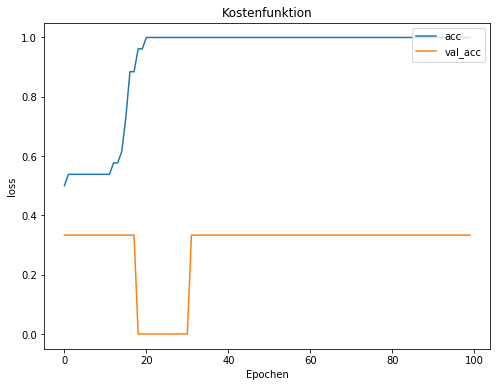

In [14]:
#Val_acc und acc Diagramm
import matplotlib.pyplot as plt

handles = []

label, = plt.plot(history.history['acc'], label="acc")
handles.append(label)
label, = plt.plot(history.history['val_acc'], label="val_acc")
handles.append(label)
plt.title('Kostenfunktion')
plt.ylabel('loss')
plt.xlabel('Epochen')
plt.legend(handles=handles, loc='upper right')
figure = plt.gcf() # get current figure
figure.set_size_inches(8, 6) # um die größe des Plots anzupassen
#plt.savefig(pathpathpaht) # hiermit kannst das ding als auch als bild an dem angegebenen ort plus name ablegen
plt.show()


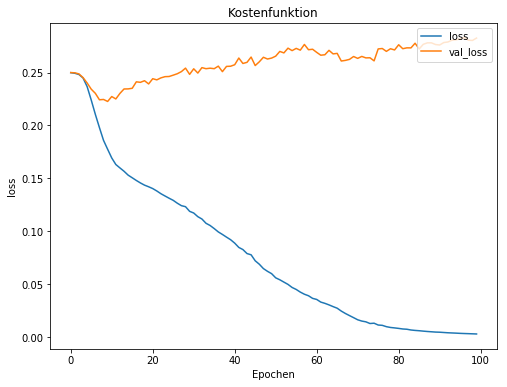

In [30]:
#Val_loss und loss Diagramm
import matplotlib.pyplot as plt

handles = []

label, = plt.plot(history.history['loss'], label="loss")
handles.append(label)
label, = plt.plot(history.history['val_loss'], label="val_loss")
handles.append(label)
plt.title('Kostenfunktion')
plt.ylabel('loss')
plt.xlabel('Epochen')
plt.legend(handles=handles, loc='upper right')
figure = plt.gcf() # get current figure
figure.set_size_inches(8, 6) # um die größe des Plots anzupassen
#plt.savefig(pathpathpaht) # hiermit kannst das ding als auch als bild an dem angegebenen ort plus name ablegen
plt.show()

In [24]:
result = regressor.evaluate(np.array(inputs_val), np.array(outputs_val))
print(result)

30/30 [==============================] - 0s 51us/step
[0.2707192003726959, 0.6666666865348816]


In [25]:
regressor.predict(np.array([[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,0 ,0, 0, 0, 0, 0, 0 , 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,0]]))

array([[0.94838]], dtype=float32)